In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(color_codes=True)
#When color_codes=True is passed as an argument to sns.set_theme(), 
# it means that Seaborn will interpret color names in various functions using their string names,
#  rather than their RGB values. This can make it easier to use common color names like "blue," "red," "green," etc., instead of having to specify the exact RGB values.

# LOAD THE DATASET 

In [2]:
dataset=pd.read_csv(r'C:\Users\91966\Desktop\machine learning\housing.csv')

In [3]:
dataset.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.23     37.88                41.0        880.0           129.0  \
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
dataset.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
20635    -121.09     39.48                25.0       1665.0           374.0  \
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value   
20635       845.0       330.0         1.5603             78100.0  \
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

# DATA PREPEOCESSING

:- Data preprocessing transforms the data into a format that is more easily and effectively processed in data mining, machine learning and other data science tasks. The techniques are generally used at the earliest stages of the machine learning and AI development pipeline to ensure accurate results.



## PART 1

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
dataset.select_dtypes(include='object').nunique() #dataset.select_dtypes(include='object') is used to select columns from the DataFrame dataset that have data type 'object', which typically includes columns containing strings (e.g., categorical variables, text data)

ocean_proximity    5
dtype: int64

In [7]:
dataset.select_dtypes(include='float64').nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
dtype: int64

In [8]:
#check the number of missing values
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
dataset.total_bedrooms.isnull().sum()
#IN THE dataset.total_bedrooms having 207 null values

207

HANDLE THE NULL VALUE

:- if the missing valuse is upto move than 10%-15% then drop the columns

:-using drop function

:-IN this case dataset.ocean_proximity is object type and it have 5 unique so we don't need to remove it 

In [10]:
# handle the missing values using mean 
dataset['total_bedrooms']=dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].mean())

In [11]:
dataset.total_bedrooms.isnull().sum()

0

In [12]:
#check the number of row and column
dataset.shape

(20640, 10)

# EXPLORATORY DATA ANALYSIS

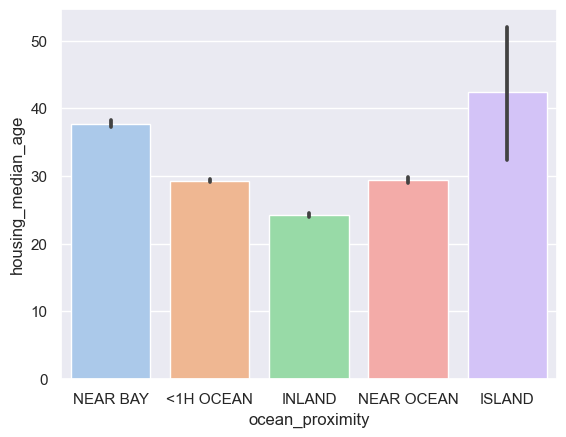

In [13]:
#list of categorical variable to plot 
house_cate=['ocean_proximity']



sns.barplot(data=dataset,x='ocean_proximity',y='housing_median_age', palette='pastel')



#show plot o
plt.show()

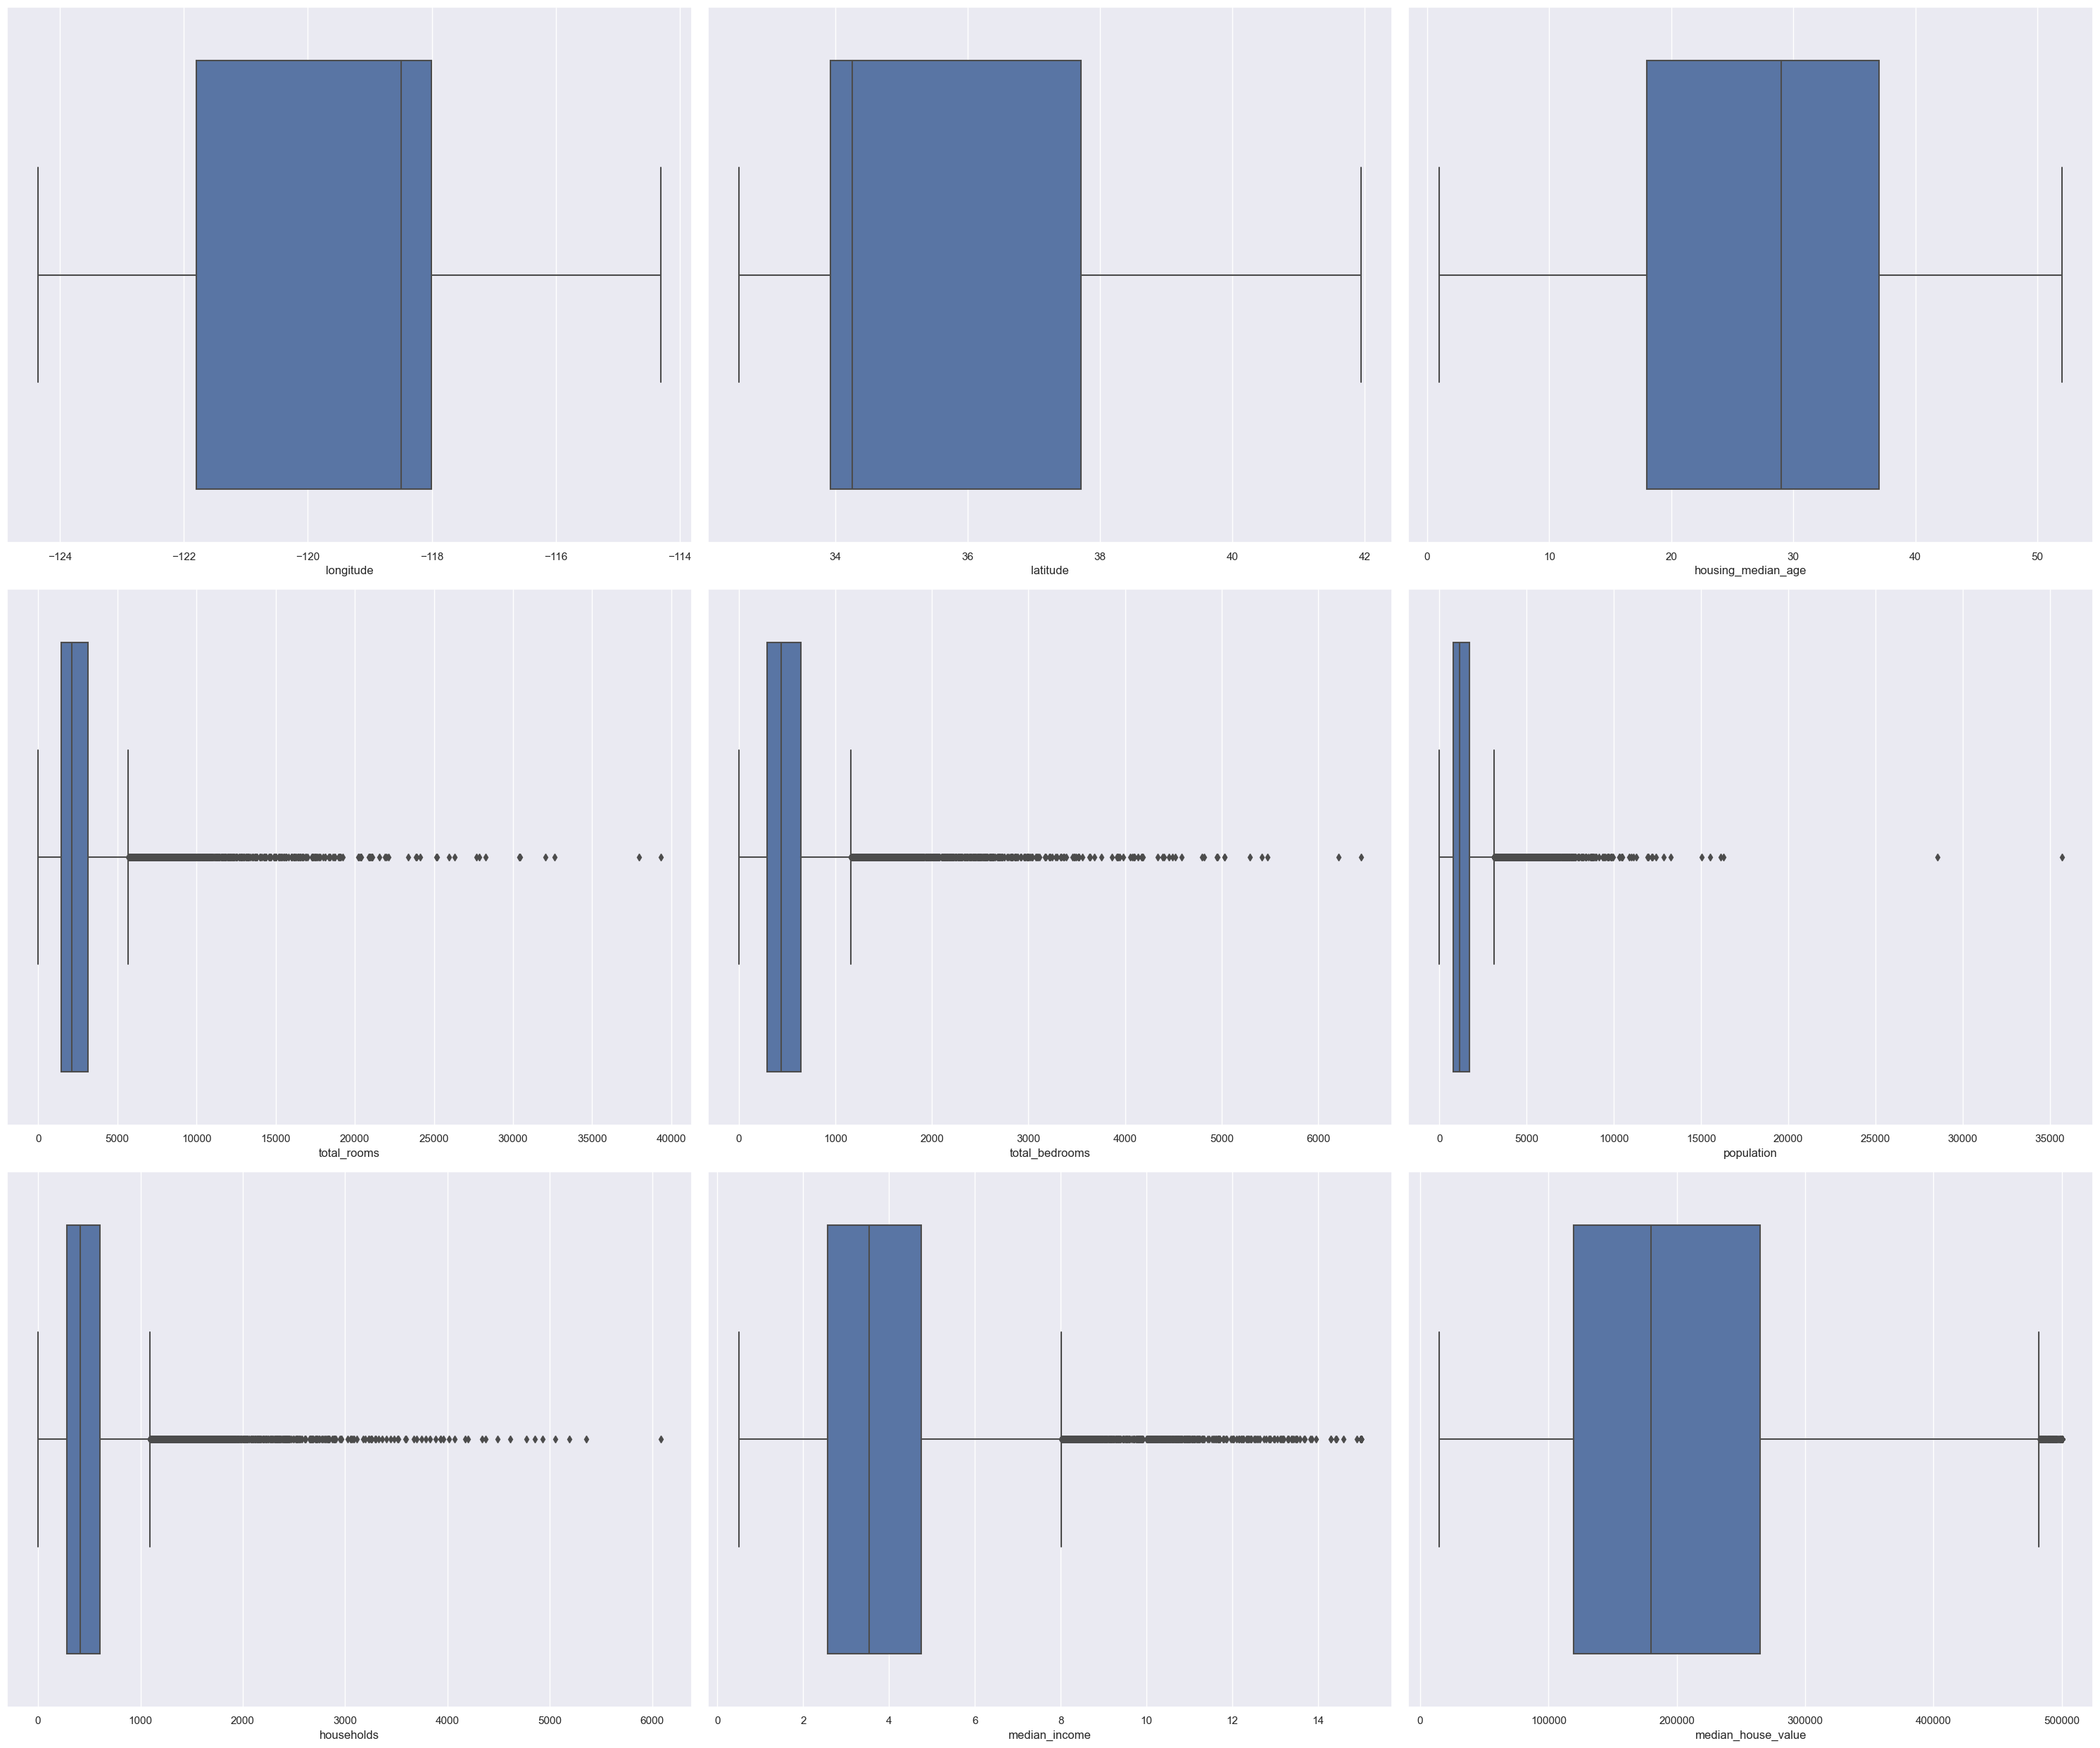

In [14]:
#list of categorical variable to plot 
house_var=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30,25))
axs = axs.flatten()
for i ,var in enumerate(house_var):
       sns.boxplot(x=var,data=dataset,ax=axs[i])

fig.tight_layout()

plt.show()

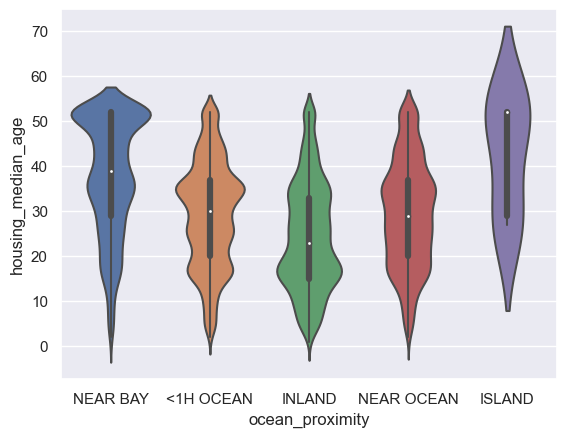

In [15]:
sns.violinplot(data=dataset,x='ocean_proximity',y='housing_median_age')
plt.show()

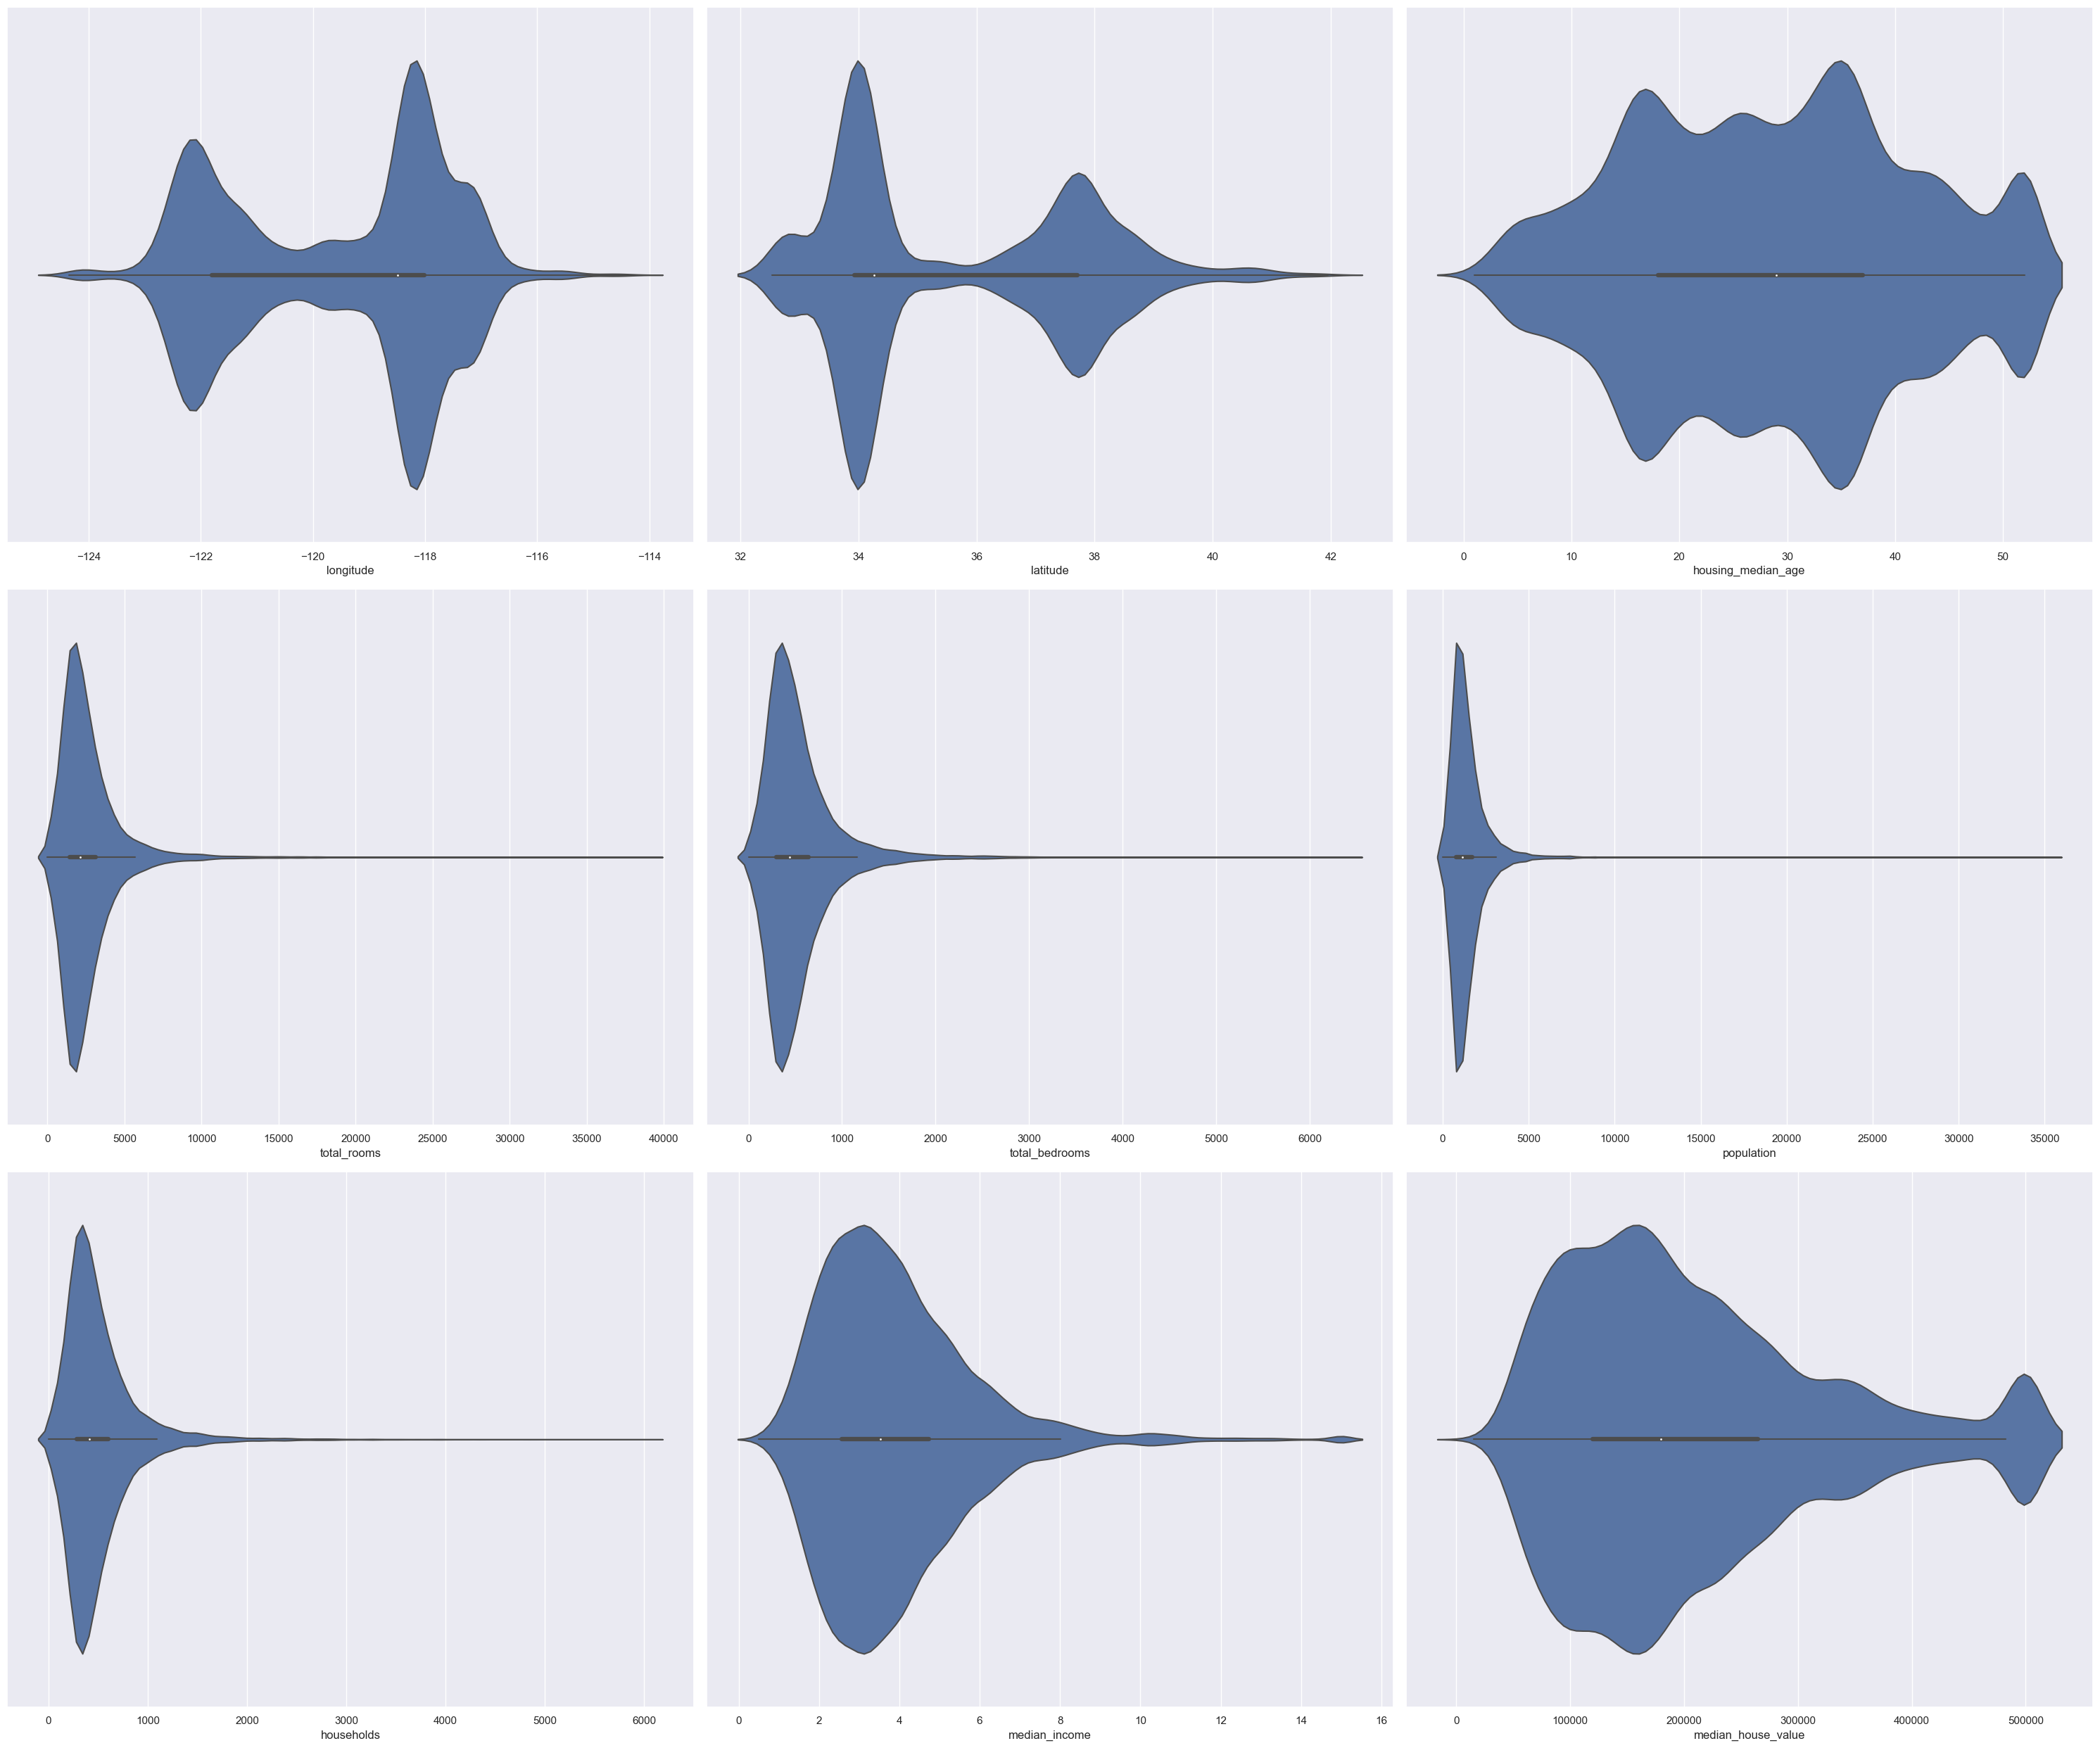

In [16]:
#list of categorical variable to plot 
house_var=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30,25))
axs = axs.flatten()
for i ,var in enumerate(house_var):
       sns.violinplot(x=var,data=dataset,ax=axs[i])

fig.tight_layout()

plt.show()

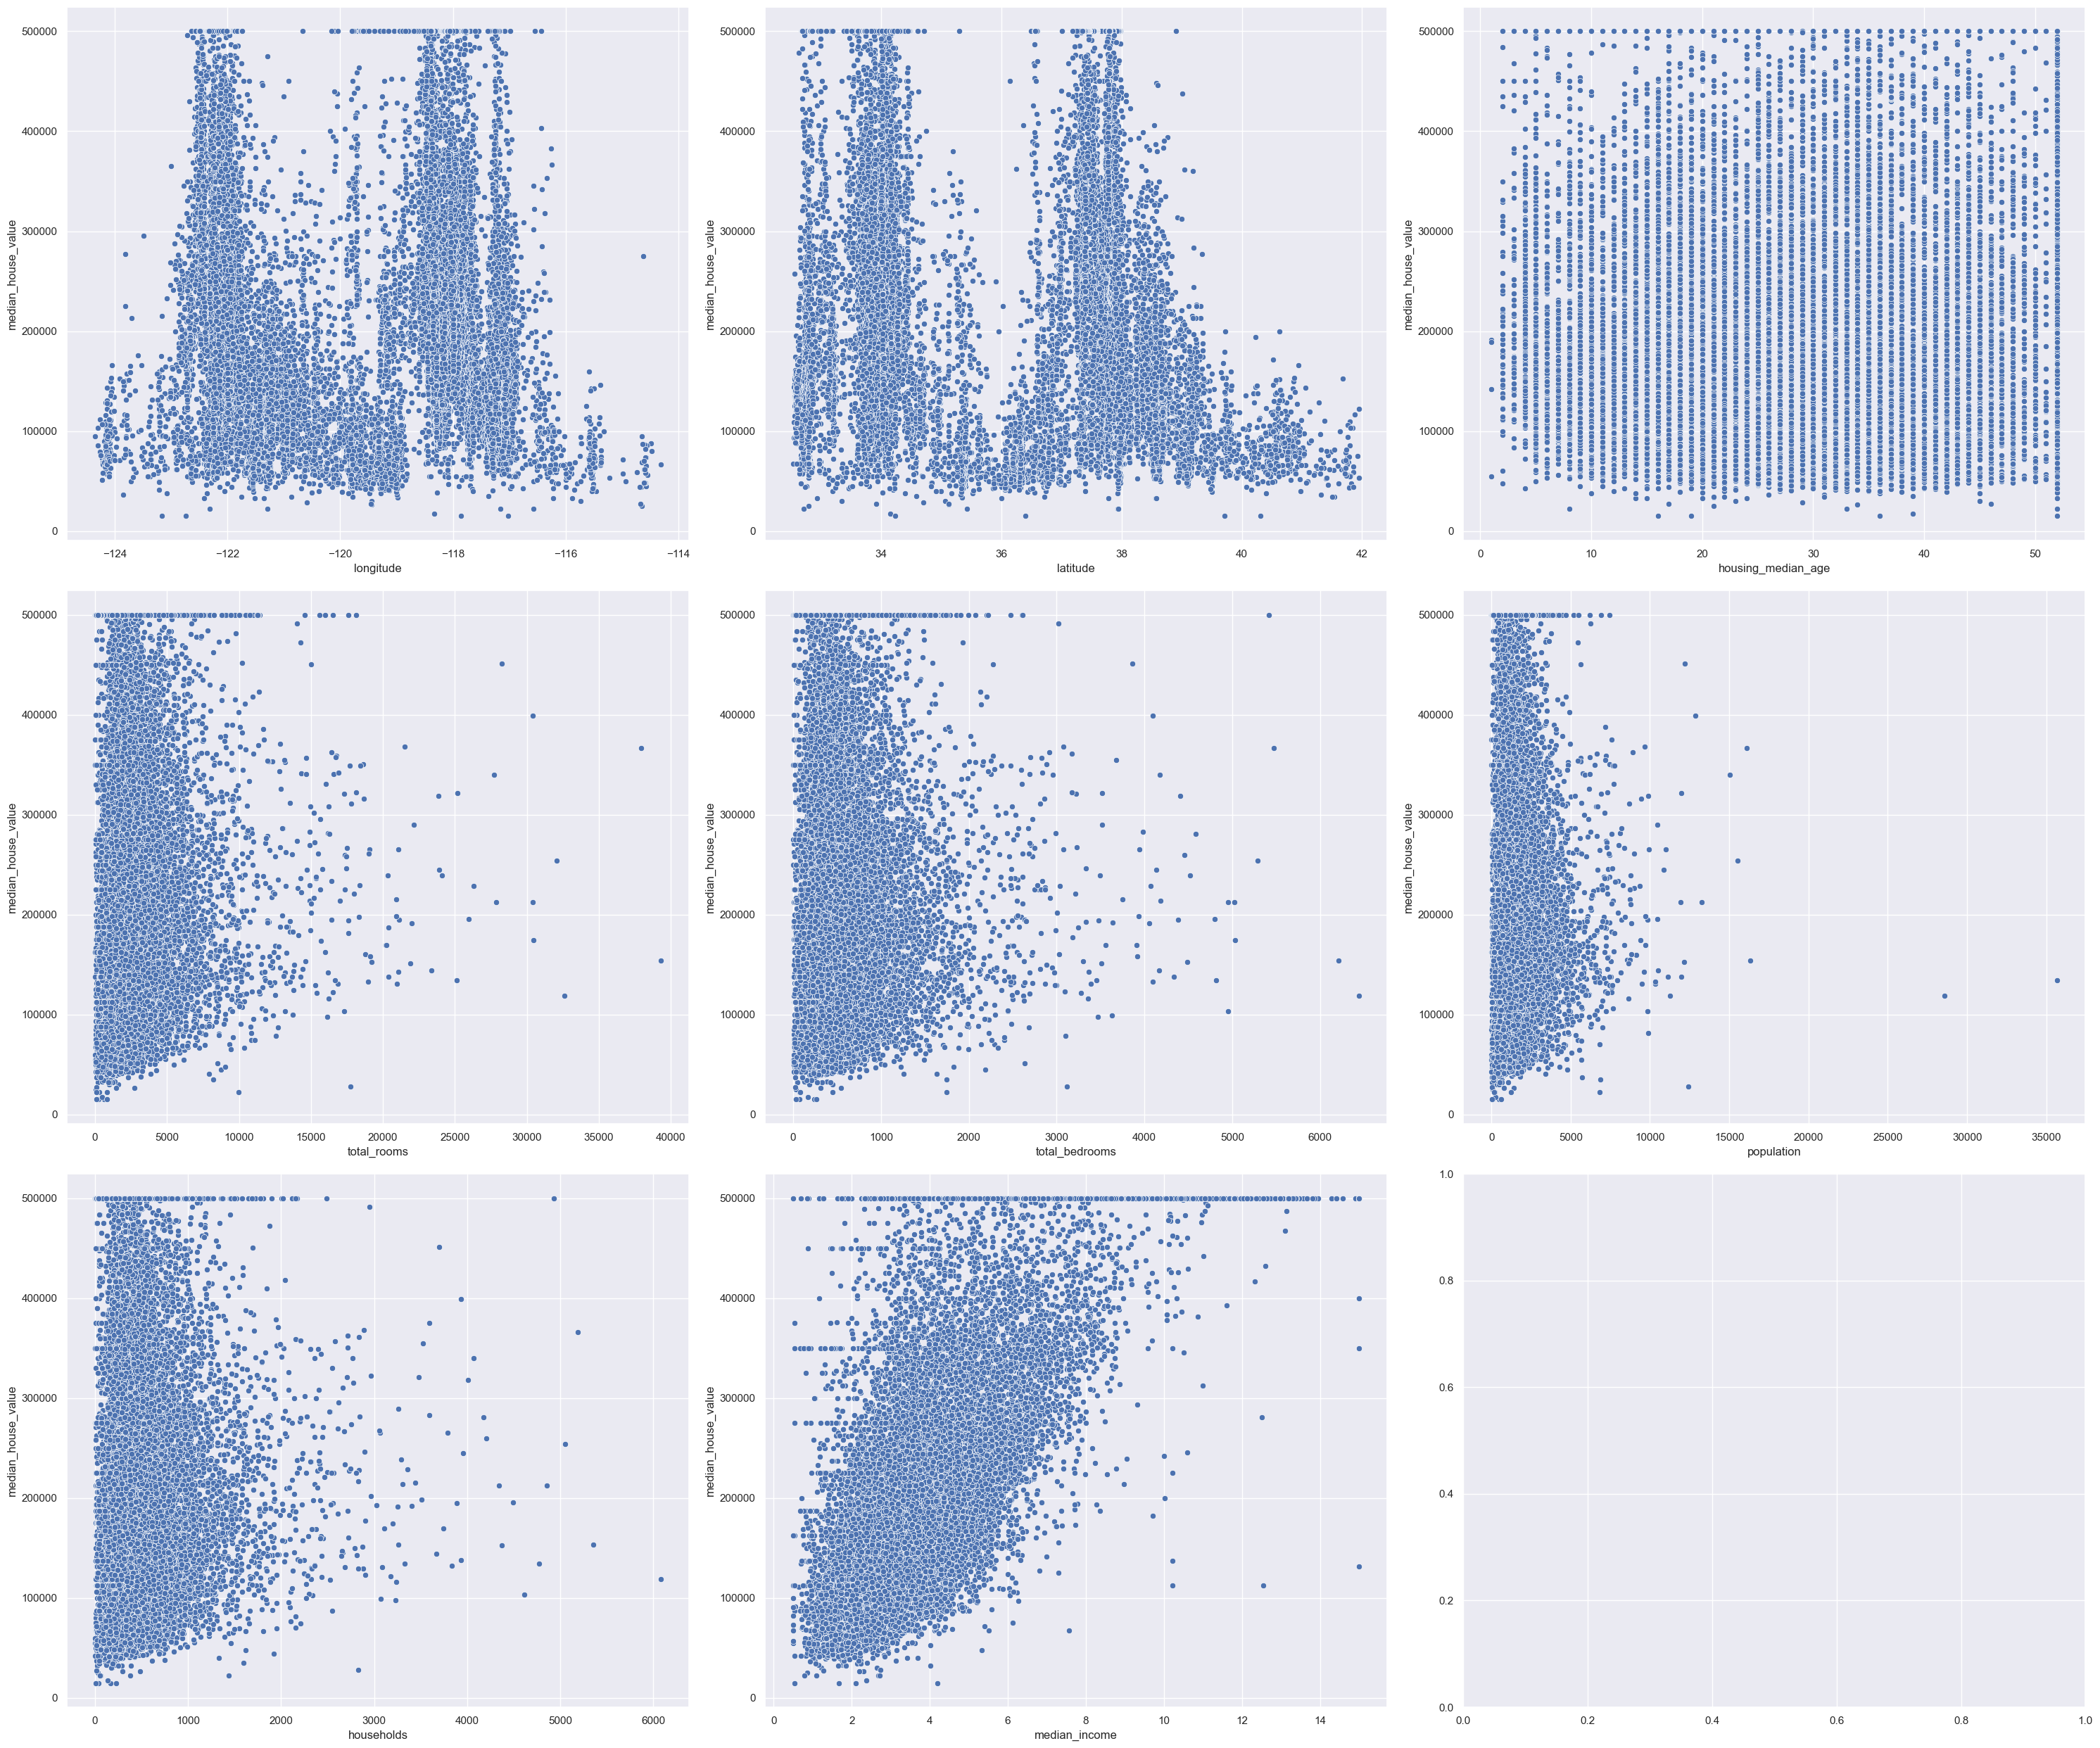

In [17]:
#list of categorical variable to plot 
house_var=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30,25))
axs = axs.flatten()
for i ,var in enumerate(house_var):
       sns.scatterplot(x=var,y='median_house_value',data=dataset,ax=axs[i])

fig.tight_layout()

plt.show()

# PART 2

In [18]:
check_missing = dataset.isnull().sum() *100/dataset.shape[0]
check_missing[check_missing >0].sort_values()

Series([], dtype: float64)

# LABEL ENCODING FOR OBJECT DATATYPES 

In [19]:
for col in dataset.select_dtypes(include=['object']).columns:
    print(f"{col}:{dataset[col].unique()}")

ocean_proximity:['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [23]:
from sklearn import preprocessing 
for col in dataset.select_dtypes(include=['object']).columns:

    label_encoder = preprocessing.LabelEncoder()

    label_encoder.fit(dataset[col].unique())
    

    dataset[col] = label_encoder.transform(dataset[col])

    print(f'{col}:{dataset[col].unique()}')


# REMOVE OUTLIERS USING IQR 

In [25]:
def remove_outliers_iqr(dataset,columns):
    for col in columns:
        q1 = dataset[col].quantile(0.25)
        q3 = dataset[col].quantile(0.75)

        iqr= q3-q1
        lower_band =  q1-1.5*iqr
        upper_band =  q3+1.5*iqr

        dataset= dataset[(dataset[col]>= lower_band) & (dataset[col]<= upper_band)]
    return dataset

columns_to_check =['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

df_clean =remove_outliers_iqr(dataset,columns_to_check)

df_clean.head(20)
       



longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
2     -122.24     37.85                52.0       1467.0           190.0  \
3     -122.25     37.85                52.0       1274.0           235.0   
4     -122.25     37.85                52.0       1627.0           280.0   
5     -122.25     37.85                52.0        919.0           213.0   
6     -122.25     37.84                52.0       2535.0           489.0   
7     -122.25     37.84                52.0       3104.0           687.0   
8     -122.26     37.84                42.0       2555.0           665.0   
9     -122.25     37.84                52.0       3549.0           707.0   
10    -122.26     37.85                52.0       2202.0           434.0   
11    -122.26     37.85                52.0       3503.0           752.0   
12    -122.26     37.85                52.0       2491.0           474.0   
13    -122.26     37.84                52.0        696.0           191.0   
14    -122.26     37.85                52.0       2643.0           626.0   
15    -122.26     37.85                50.0       1120.0           283.0   
16    -122.27     37.85                52.0       1966.0           347.0   
17    -122.27     37.85                52.0       1228.0           293.0   
18    -122.26     37.84                50.0       2239.0           455.0   
19    -122.27     37.84                52.0       1503.0           298.0   
20    -122.27     37.85                40.0        751.0           184.0   
21    -122.27     37.85                42.0       1639.0           367.0   

    population  households  median_income  median_house_value  ocean_proximity  
2        496.0       177.0         7.2574            352100.0                3  
3        558.0       219.0         5.6431            341300.0                3  
4        565.0       259.0         3.8462            342200.0                3  
5        413.0       193.0         4.0368            269700.0                3  
6       1094.0       514.0         3.6591            299200.0                3  
7       1157.0       647.0         3.1200            241400.0                3  
8       1206.0       595.0         2.0804            226700.0                3  
9       1551.0       714.0         3.6912            261100.0                3  
10       910.0       402.0         3.2031            281500.0                3  
11      1504.0       734.0         3.2705            241800.0                3  
12      1098.0       468.0         3.0750            213500.0                3  
13       345.0       174.0         2.6736            191300.0                3  
14      1212.0       620.0         1.9167            159200.0                3  
15       697.0       264.0         2.1250            140000.0                3  
16       793.0       331.0         2.7750            152500.0                3  
17       648.0       303.0         2.1202            155500.0                3  
18       990.0       419.0         1.9911            158700.0                3  
19       690.0       275.0         2.6033            162900.0                3  
20       409.0       166.0         1.3578            147500.0                3  
21       929.0       366.0         1.7135            159800.0                3

In [26]:
df_clean.shape

(17532, 10)

# CORRELATION HEATMAP

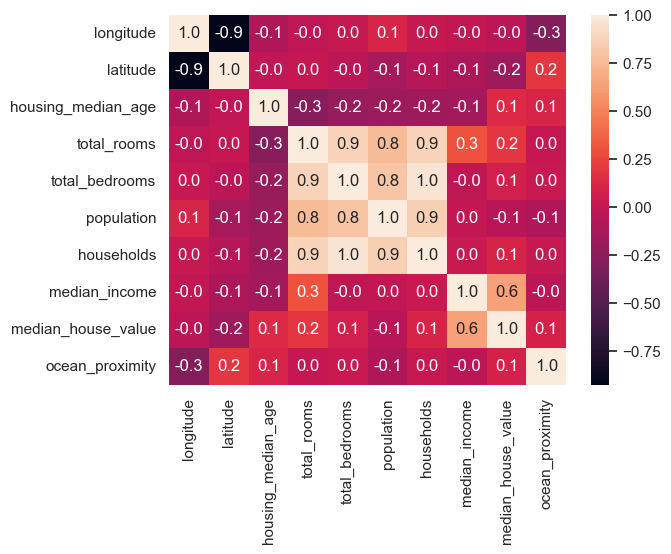

In [32]:
plt.Figure(figsize=(50,50))
sns.heatmap(df_clean.corr(method='pearson'),fmt='.1f',annot=True)
plt.show()

# TRAIN TEST SPLIT

In [35]:
X=df_clean.drop('median_house_value',axis=1)
Y=df_clean['median_house_value']

In [47]:
from sklearn.model_selection import train_test_split


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# LINEAR REGRESSION MODEL

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [50]:
print(regr.score(X_test, Y_test))

0.6023960199330913


In [56]:
from sklearn.metrics import  mean_absolute_error,mean_squared_error

Y_pred = regr.predict(X_test)
MAE =  mean_absolute_error(Y_test, Y_pred)
MSE =  mean_squared_error(Y_test, Y_pred)
print("MAE IS {}".format(MAE))
print("MSE IS {}".format(MSE))


MAE IS 51006.51406723928
MSE IS 4846102478.661828


In [58]:
import pandas as pd 
df= pd.DataFrame(Y_pred,Y_test)

In [59]:
df

0
median_house_value               
109000.0            139578.023924
249100.0            184495.098074
130600.0            232965.791731
230500.0            238875.732349
170600.0            178832.774288
...                           ...
173900.0            239948.208924
260100.0            201177.627095
287500.0            294556.192025
117000.0            155692.302710
190000.0            251547.168512

[3507 rows x 1 columns]

# PART 2

:- THIS IS HOW IS PREDICTION IS LOOKING

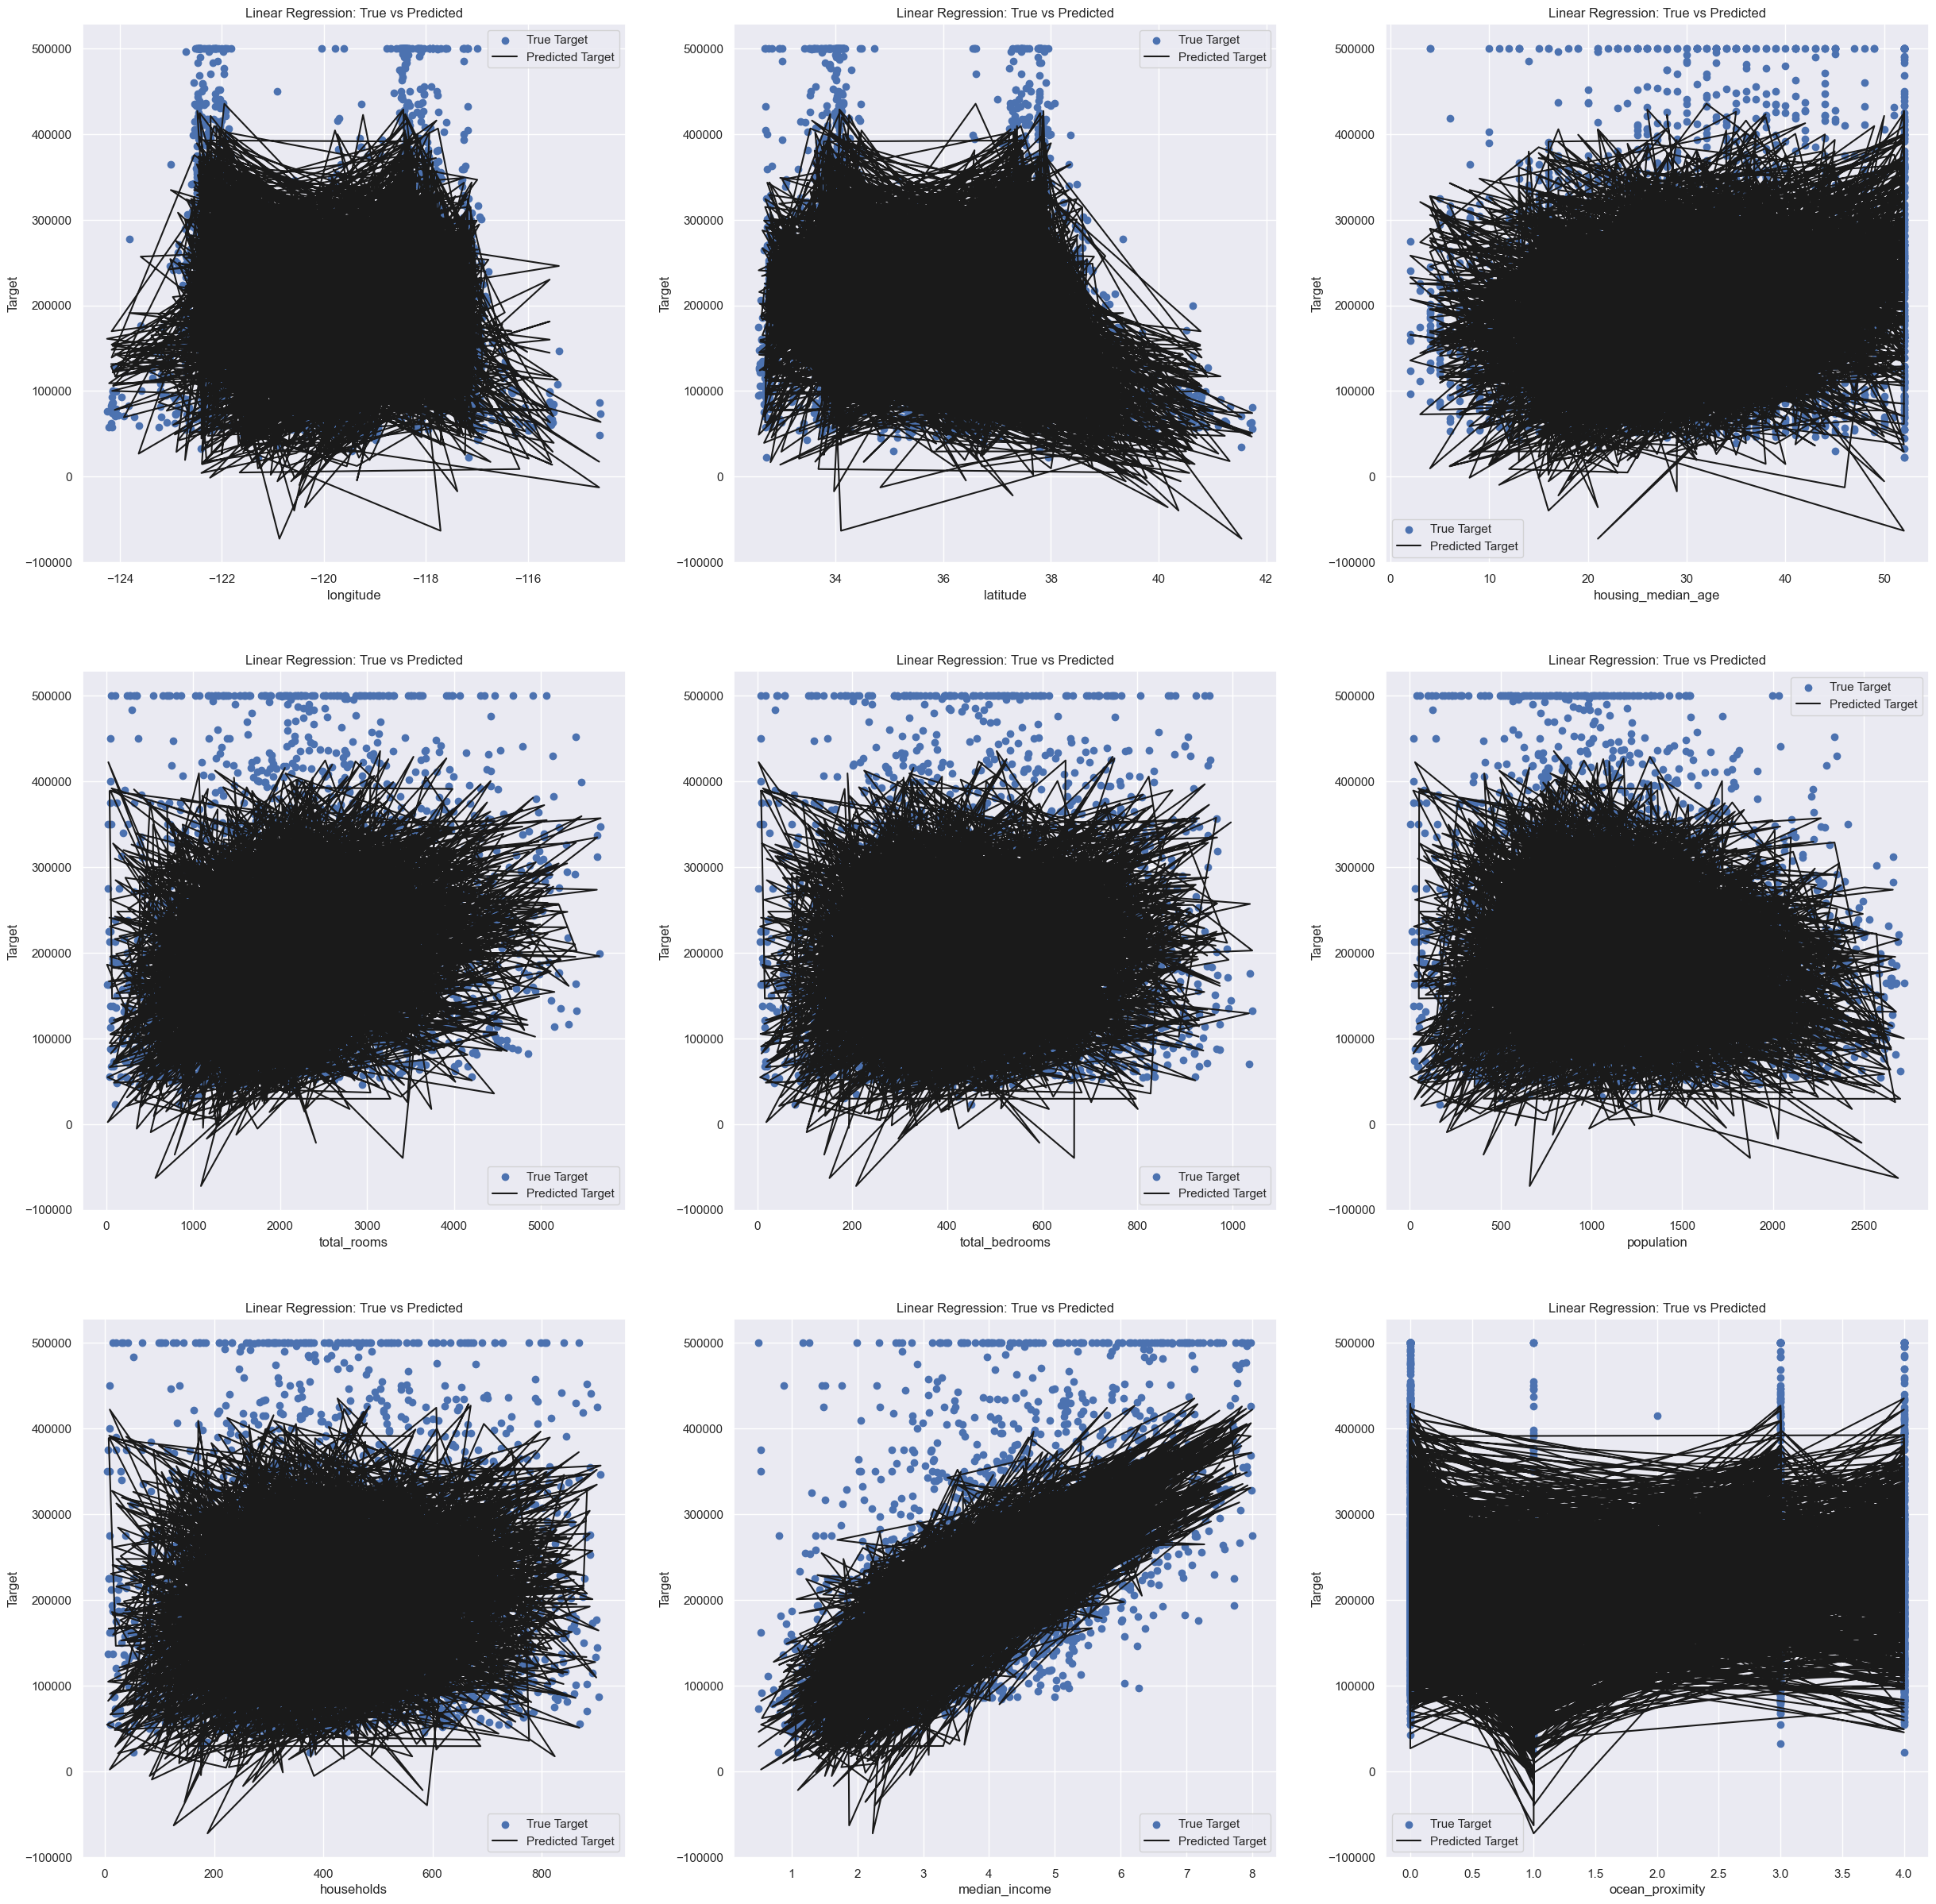

In [86]:


X_test_df = pd.DataFrame(X_test, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                                          'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity'])
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))
axs = axs.flatten()

for i, col in enumerate(X_test_df.columns):
    X_feature = X_test_df[col]
    axs[i].scatter(X_feature, Y_test, color='b', label='True Target')  # Use axs[i].scatter instead of plt.scatter
    axs[i].plot(X_feature, Y_pred, color='k', label='Predicted Target')  # Use axs[i].plot instead of plt.plot
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Target')
    axs[i].set_title('Linear Regression: True vs Predicted')
    axs[i].legend()

plt.show()


# LET CHOOSE THE PERFECT FEATURES

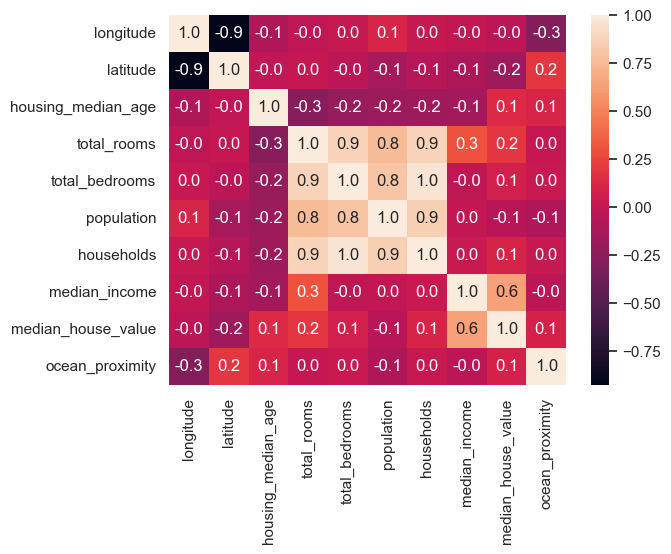

In [87]:
plt.Figure(figsize=(50,50))
sns.heatmap(df_clean.corr(method='pearson'),fmt='.1f',annot=True)
plt.show()

In [94]:

X=df_clean[['population','median_income','total_rooms','total_bedrooms','total_bedrooms', 'population', 'households']]
Y=df_clean['median_house_value']

In [95]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [96]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [97]:
print(regr.score(X_test, Y_test))

0.49414164921731507


In [98]:
Y_pred = regr.predict(X_test)
MAE =  mean_absolute_error(Y_test, Y_pred)
MSE =  mean_squared_error(Y_test, Y_pred)
print("MAE IS {}".format(MAE))
print("MSE IS {}".format(MSE))


MAE IS 57897.31481068274
MSE IS 6165535383.139843
